In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [2]:
df = pd.read_csv(r'D:\Visualizations\LOAN_DATA\train_indessa.csv')

In [3]:
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [4]:
df.shape

(532428, 45)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   funded_amnt                  532428 non-null  int64  
 3   funded_amnt_inv              532428 non-null  float64
 4   term                         532428 non-null  object 
 5   batch_enrolled               447279 non-null  object 
 6   int_rate                     532428 non-null  float64
 7   grade                        532428 non-null  object 
 8   sub_grade                    532428 non-null  object 
 9   emp_title                    501595 non-null  object 
 10  emp_length                   505537 non-null  object 
 11  home_ownership               532428 non-null  object 
 12  annual_inc                   532425 non-null  float64
 13 

In [6]:
null_cols = df.columns[df.isnull().any()]
null_cols

Index(['batch_enrolled', 'emp_title', 'emp_length', 'annual_inc', 'desc',
       'title', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_util',
       'total_acc', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'verification_status_joint',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [7]:
null_df = df[null_cols].isnull().sum().to_frame(name='Null Count').merge(df[null_cols].isnull().mean().mul(100).to_frame(name='Null Percent'), left_index=True, right_index=True)

In [8]:
null_df_sorted = null_df.sort_values(by='Null Count', ascending=False)
null_df_sorted

,Null Count,Null Percent
verification_status_joint,532123,99.942715
desc,456829,85.801085
mths_since_last_record,450305,84.575755
mths_since_last_major_derog,399448,75.023853
mths_since_last_delinq,272554,51.190771
batch_enrolled,85149,15.992585
tot_cur_bal,42004,7.889142
tot_coll_amt,42004,7.889142
total_rev_hi_lim,42004,7.889142
emp_title,30833,5.791018


In [9]:
duplicates_by_rows = df[df.duplicated()].shape[0]
duplicates_by_rows

0

In [10]:
df_new = df[['funded_amnt_inv', 'term', 'int_rate', 'emp_length', 'emp_title', 'annual_inc',
             'verification_status', 'purpose', 'addr_state', 'dti', 'initial_list_status',
             'total_rec_int', 'total_rec_late_fee', 'application_type', 'tot_coll_amt',
             'tot_cur_bal', 'loan_status']].rename(columns={
    'funded_amnt_inv': 'BANK_INVESTMENT',
    'term': 'TERM',
    'int_rate': 'INTEREST_RATE',
    'emp_length': 'EMPLOYEMENT_DURATION',
    'emp_title': 'EMPPLOYMENT_TITLE',
    'annual_inc': 'ANNUAL_INCOME',
    'verification_status': 'STATUS',
    'purpose': 'LOAN_PURPOSE',
    'addr_state': 'STATE',
    'dti': 'DTI',
    'initial_list_status': 'INITIAL_LIST_STATUS',
    'total_rec_int': 'RECEIVED_INTEREST_TOTAL',
    'total_rec_late_fee': 'RECEIVED_LATE_FEE',
    'application_type': 'APPLICATION_TYPE',
    'tot_coll_amt': 'TOTAL_COLLECTION_AMOUNT',
    'tot_cur_bal': 'TOTAL_CURRENT_BALANCE',
    'loan_status': 'LOAN_STATUS'
})


df_new.to_excel('EDA_data.xlsx', index=False)

In [11]:
data_xlsx = pd.read_excel(r'D:\Visualizations\LOAN_DATA\EDA_data.xlsx')
data_xlsx.to_csv('req_data.csv', encoding='utf-8', index=False)

In [12]:
df_1 = pd.read_csv(r'D:\Visualizations\LOAN_DATA\req_data.csv')

In [13]:
df_1.head()

,BANK_INVESTMENT,TERM,INTEREST_RATE,EMPLOYEMENT_DURATION,EMPPLOYMENT_TITLE,ANNUAL_INCOME,STATUS,LOAN_PURPOSE,STATE,DTI,INITIAL_LIST_STATUS,RECEIVED_INTEREST_TOTAL,RECEIVED_LATE_FEE,APPLICATION_TYPE,TOTAL_COLLECTION_AMOUNT,TOTAL_CURRENT_BALANCE,LOAN_STATUS
0,14350.0,36 months,19.19,9 years,clerk,28700.0,Source Verified,debt_consolidation,FL,33.88,f,1173.84,0.0,INDIVIDUAL,0.0,28699.0,0
1,4800.0,36 months,10.99,< 1 year,Human Resources Specialist,65000.0,Source Verified,home_improvement,MD,3.64,w,83.95,0.0,INDIVIDUAL,0.0,9974.0,0
2,10000.0,36 months,7.26,2 years,Driver,45000.0,Not Verified,debt_consolidation,OH,18.42,w,56.47,0.0,INDIVIDUAL,65.0,38295.0,0
3,15000.0,36 months,19.72,10+ years,Us office of Personnel Management,105000.0,Not Verified,debt_consolidation,VA,14.97,f,4858.62,0.0,INDIVIDUAL,0.0,55564.0,0
4,16000.0,36 months,10.64,10+ years,LAUSD-HOLLYWOOD HIGH SCHOOL,52000.0,Verified,credit_card,CA,20.16,w,2296.41,0.0,INDIVIDUAL,0.0,47159.0,0


In [14]:
df_nulls = df_1.columns[df_1.isnull().any()]
df_nulls

Index(['EMPLOYEMENT_DURATION', 'EMPPLOYMENT_TITLE', 'ANNUAL_INCOME',
       'TOTAL_COLLECTION_AMOUNT', 'TOTAL_CURRENT_BALANCE'],
      dtype='object')

In [15]:
df_null_cols = df_1[df_nulls].isnull().mean().mul(100).to_frame(name='Null Percent')
df_null_cols

,Null Percent
EMPLOYEMENT_DURATION,5.050636
EMPPLOYMENT_TITLE,5.791018
ANNUAL_INCOME,0.000563
TOTAL_COLLECTION_AMOUNT,7.889142
TOTAL_CURRENT_BALANCE,7.889142


In [16]:
df_null_cols = df_null_cols.sort_values(by='Null Percent', ascending=False)
df_null_cols

,Null Percent
TOTAL_COLLECTION_AMOUNT,7.889142
TOTAL_CURRENT_BALANCE,7.889142
EMPPLOYMENT_TITLE,5.791018
EMPLOYEMENT_DURATION,5.050636
ANNUAL_INCOME,0.000563


DATA TRANSFORMATION

In [17]:
df_1.drop(['EMPPLOYMENT_TITLE'], axis=1, inplace=True)
df_1.head()


,BANK_INVESTMENT,TERM,INTEREST_RATE,EMPLOYEMENT_DURATION,ANNUAL_INCOME,STATUS,LOAN_PURPOSE,STATE,DTI,INITIAL_LIST_STATUS,RECEIVED_INTEREST_TOTAL,RECEIVED_LATE_FEE,APPLICATION_TYPE,TOTAL_COLLECTION_AMOUNT,TOTAL_CURRENT_BALANCE,LOAN_STATUS
0,14350.0,36 months,19.19,9 years,28700.0,Source Verified,debt_consolidation,FL,33.88,f,1173.84,0.0,INDIVIDUAL,0.0,28699.0,0
1,4800.0,36 months,10.99,< 1 year,65000.0,Source Verified,home_improvement,MD,3.64,w,83.95,0.0,INDIVIDUAL,0.0,9974.0,0
2,10000.0,36 months,7.26,2 years,45000.0,Not Verified,debt_consolidation,OH,18.42,w,56.47,0.0,INDIVIDUAL,65.0,38295.0,0
3,15000.0,36 months,19.72,10+ years,105000.0,Not Verified,debt_consolidation,VA,14.97,f,4858.62,0.0,INDIVIDUAL,0.0,55564.0,0
4,16000.0,36 months,10.64,10+ years,52000.0,Verified,credit_card,CA,20.16,w,2296.41,0.0,INDIVIDUAL,0.0,47159.0,0


In [18]:
df_1['TERM'].head()

0    36 months
1    36 months
2    36 months
3    36 months
4    36 months
Name: TERM, dtype: object

In [19]:
from numpy import dtype


df_1['TERM'] = df_1['TERM'].str.replace(' months', '')
df_1['TERM'] = df_1['TERM'].astype(int)
x = dtype(df_1['TERM'])
x


dtype('int32')

In [20]:
df_1['TERM'].head()

0    36
1    36
2    36
3    36
4    36
Name: TERM, dtype: int32

In [21]:
df_1['EMPLOYEMENT_DURATION'] = df_1['EMPLOYEMENT_DURATION'].str.replace('years', '')
df_1['EMPLOYEMENT_DURATION'] = df_1['EMPLOYEMENT_DURATION'].str.replace('year', '')
df_1['EMPLOYEMENT_DURATION'] = df_1['EMPLOYEMENT_DURATION'].str.replace('+', '')
df_1['EMPLOYEMENT_DURATION'] = df_1['EMPLOYEMENT_DURATION'].str.replace('< 1', '0')
df_1['EMPLOYEMENT_DURATION'] = df_1['EMPLOYEMENT_DURATION'].fillna(-1)
df_1['EMPLOYEMENT_DURATION'] = df_1['EMPLOYEMENT_DURATION'].astype(int)

In [22]:
df_1['EMPLOYEMENT_DURATION'].head()

0     9
1     0
2     2
3    10
4    10
Name: EMPLOYEMENT_DURATION, dtype: int32

In [23]:
df_1.columns

Index(['BANK_INVESTMENT', 'TERM', 'INTEREST_RATE', 'EMPLOYEMENT_DURATION',
       'ANNUAL_INCOME', 'STATUS', 'LOAN_PURPOSE', 'STATE', 'DTI',
       'INITIAL_LIST_STATUS', 'RECEIVED_INTEREST_TOTAL', 'RECEIVED_LATE_FEE',
       'APPLICATION_TYPE', 'TOTAL_COLLECTION_AMOUNT', 'TOTAL_CURRENT_BALANCE',
       'LOAN_STATUS'],
      dtype='object')

In [24]:
df_1.to_csv('Ready_for_EDA.csv', index=False)


In [25]:
df_2 = pd.read_csv(r'D:\Visualizations\LOAN_DATA\Ready_for_EDA.csv')
df_2.head()

,BANK_INVESTMENT,TERM,INTEREST_RATE,EMPLOYEMENT_DURATION,ANNUAL_INCOME,STATUS,LOAN_PURPOSE,STATE,DTI,INITIAL_LIST_STATUS,RECEIVED_INTEREST_TOTAL,RECEIVED_LATE_FEE,APPLICATION_TYPE,TOTAL_COLLECTION_AMOUNT,TOTAL_CURRENT_BALANCE,LOAN_STATUS
0,14350.0,36,19.19,9,28700.0,Source Verified,debt_consolidation,FL,33.88,f,1173.84,0.0,INDIVIDUAL,0.0,28699.0,0
1,4800.0,36,10.99,0,65000.0,Source Verified,home_improvement,MD,3.64,w,83.95,0.0,INDIVIDUAL,0.0,9974.0,0
2,10000.0,36,7.26,2,45000.0,Not Verified,debt_consolidation,OH,18.42,w,56.47,0.0,INDIVIDUAL,65.0,38295.0,0
3,15000.0,36,19.72,10,105000.0,Not Verified,debt_consolidation,VA,14.97,f,4858.62,0.0,INDIVIDUAL,0.0,55564.0,0
4,16000.0,36,10.64,10,52000.0,Verified,credit_card,CA,20.16,w,2296.41,0.0,INDIVIDUAL,0.0,47159.0,0


EXPLORATORY DATA ANALYSIS

In [26]:
cat_columns = df_2.select_dtypes(include=['object']).columns
cat_columns

Index(['STATUS', 'LOAN_PURPOSE', 'STATE', 'INITIAL_LIST_STATUS',
       'APPLICATION_TYPE'],
      dtype='object')

In [27]:
num_columns = df_2.select_dtypes(include=['number']).columns
num_columns

Index(['BANK_INVESTMENT', 'TERM', 'INTEREST_RATE', 'EMPLOYEMENT_DURATION',
       'ANNUAL_INCOME', 'DTI', 'RECEIVED_INTEREST_TOTAL', 'RECEIVED_LATE_FEE',
       'TOTAL_COLLECTION_AMOUNT', 'TOTAL_CURRENT_BALANCE', 'LOAN_STATUS'],
      dtype='object')

In [28]:
df_2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
BANK_INVESTMENT,532428.0,NaN,NaN,NaN,14704.926696,8441.290381,0.0,8000.0,13000.0,20000.0,35000.0
TERM,532428.0,NaN,NaN,NaN,43.19579,10.996354,36.0,36.0,36.0,60.0,60.0
INTEREST_RATE,532428.0,NaN,NaN,NaN,13.242969,4.379611,5.32,9.99,12.99,16.2,28.99
EMPLOYEMENT_DURATION,532428.0,NaN,NaN,NaN,5.656481,3.887653,-1.0,2.0,6.0,10.0,10.0
ANNUAL_INCOME,532425.0,NaN,NaN,NaN,75029.843289,65199.845014,1200.0,45000.0,65000.0,90000.0,9500000.0
STATUS,532428,3,Source Verified,197750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LOAN_PURPOSE,532428,14,debt_consolidation,314989,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STATE,532428,51,CA,77911,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DTI,532428.0,NaN,NaN,NaN,18.138767,8.369074,0.0,11.93,17.65,23.95,672.52
INITIAL_LIST_STATUS,532428,2,f,274018,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
import seaborn as sns

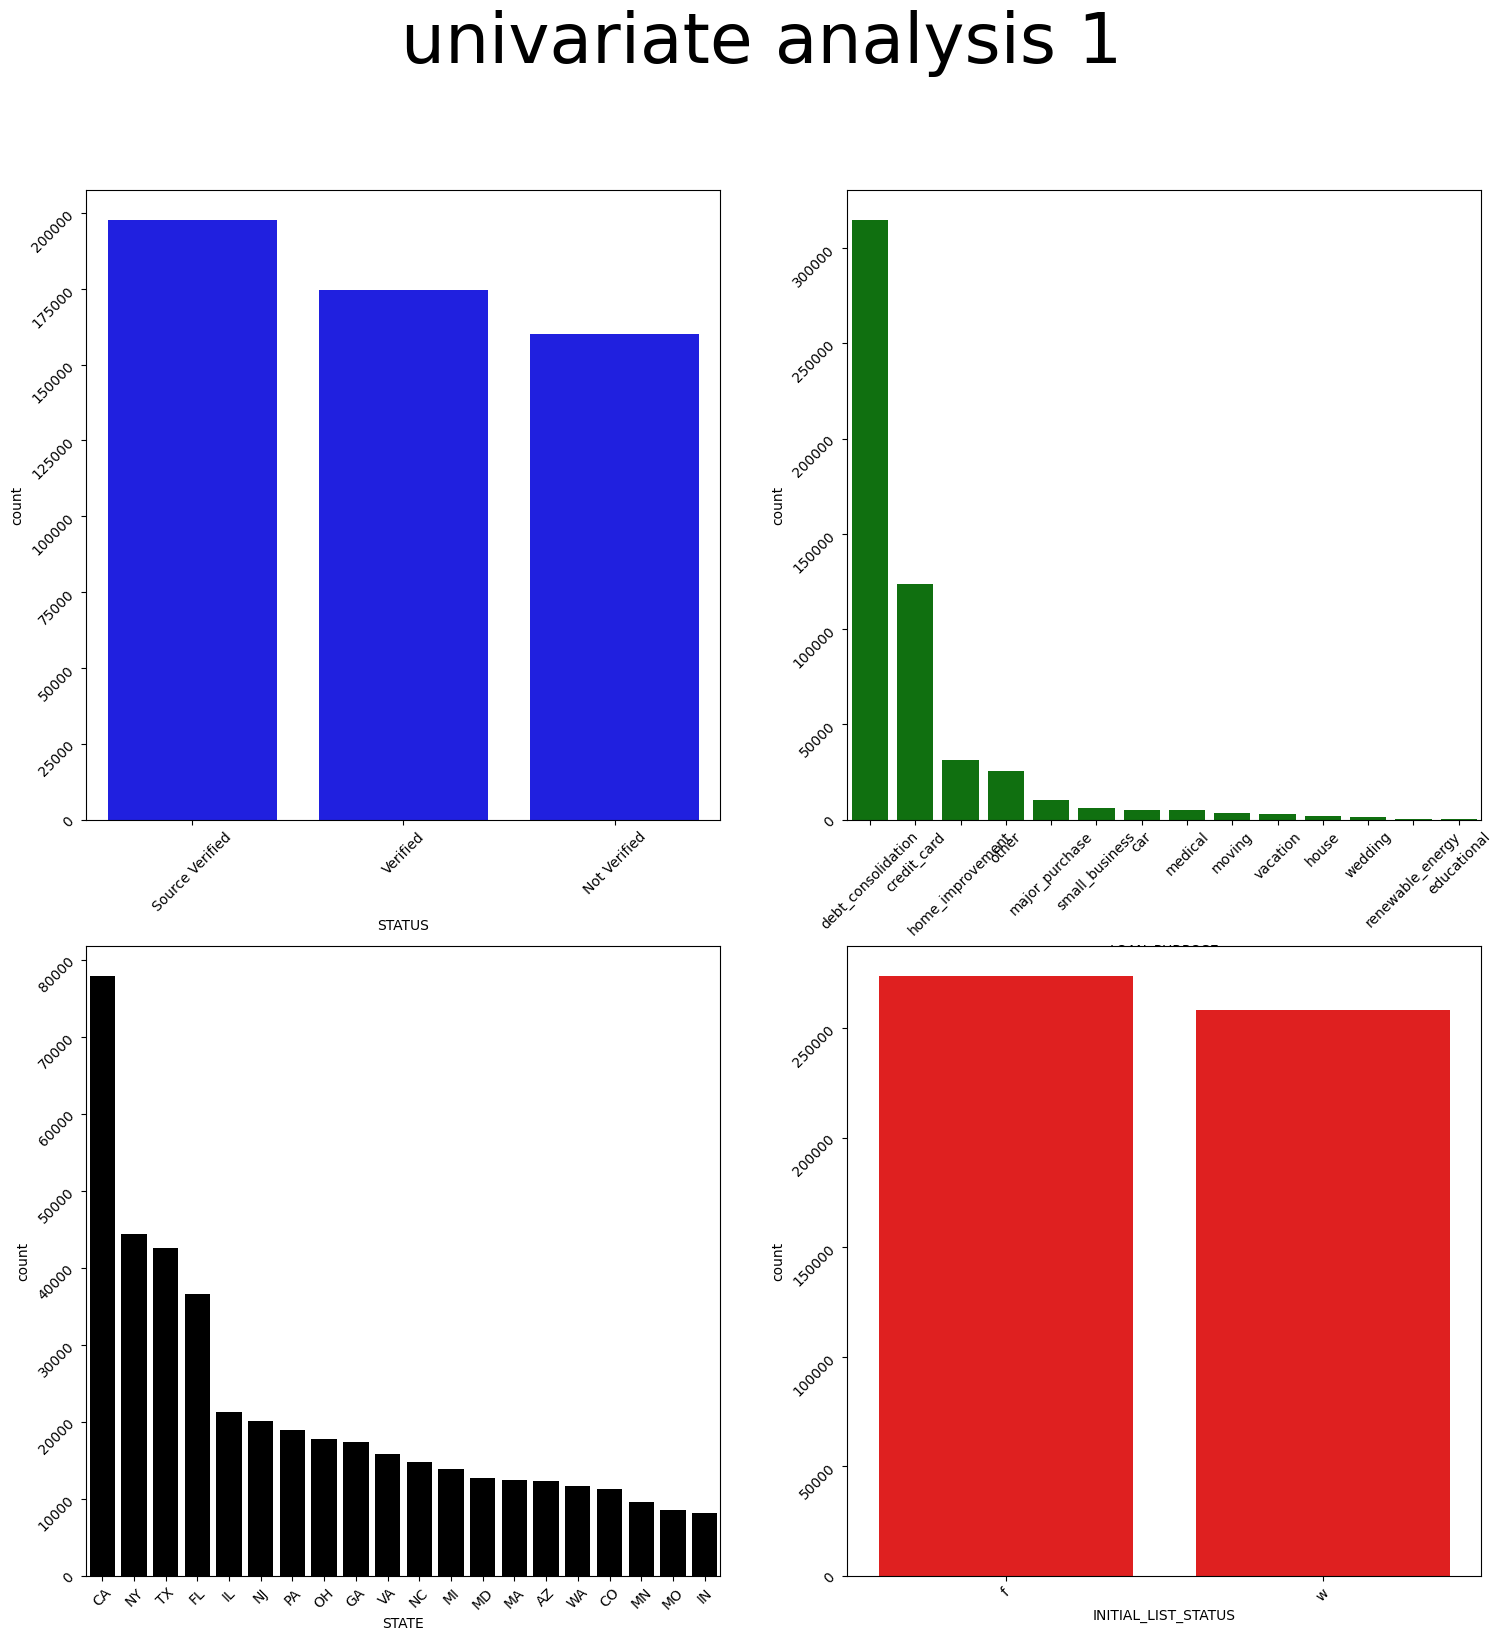

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(18,18))
plt.suptitle("univariate analysis 1", size=(50))

sns.countplot(ax=axes[0,0], x='STATUS', data=df_2, color='blue', order=df_2['STATUS'].value_counts().index)
sns.countplot(ax=axes[0,1], x='LOAN_PURPOSE', data=df_2, color='green', order=df_2['LOAN_PURPOSE'].value_counts().index)
sns.countplot(ax=axes[1, 0], x='STATE', data=df_2, color='black', order=df_2['STATE'].value_counts().index[:20]) # top 20 most frequent values
sns.countplot(ax=axes[1, 1], x='INITIAL_LIST_STATUS', data=df_2, color='red', order=df_2['INITIAL_LIST_STATUS'].value_counts().index)


# axes rotation

axes[0][0].tick_params(labelrotation=45)
axes[0][1].tick_params(labelrotation=45)
axes[1][0].tick_params(labelrotation=45)
axes[1][1].tick_params(labelrotation=45)

BIVARIATE ANALYSIS

[Text(0, 0, '60'), Text(1, 0, '36')]

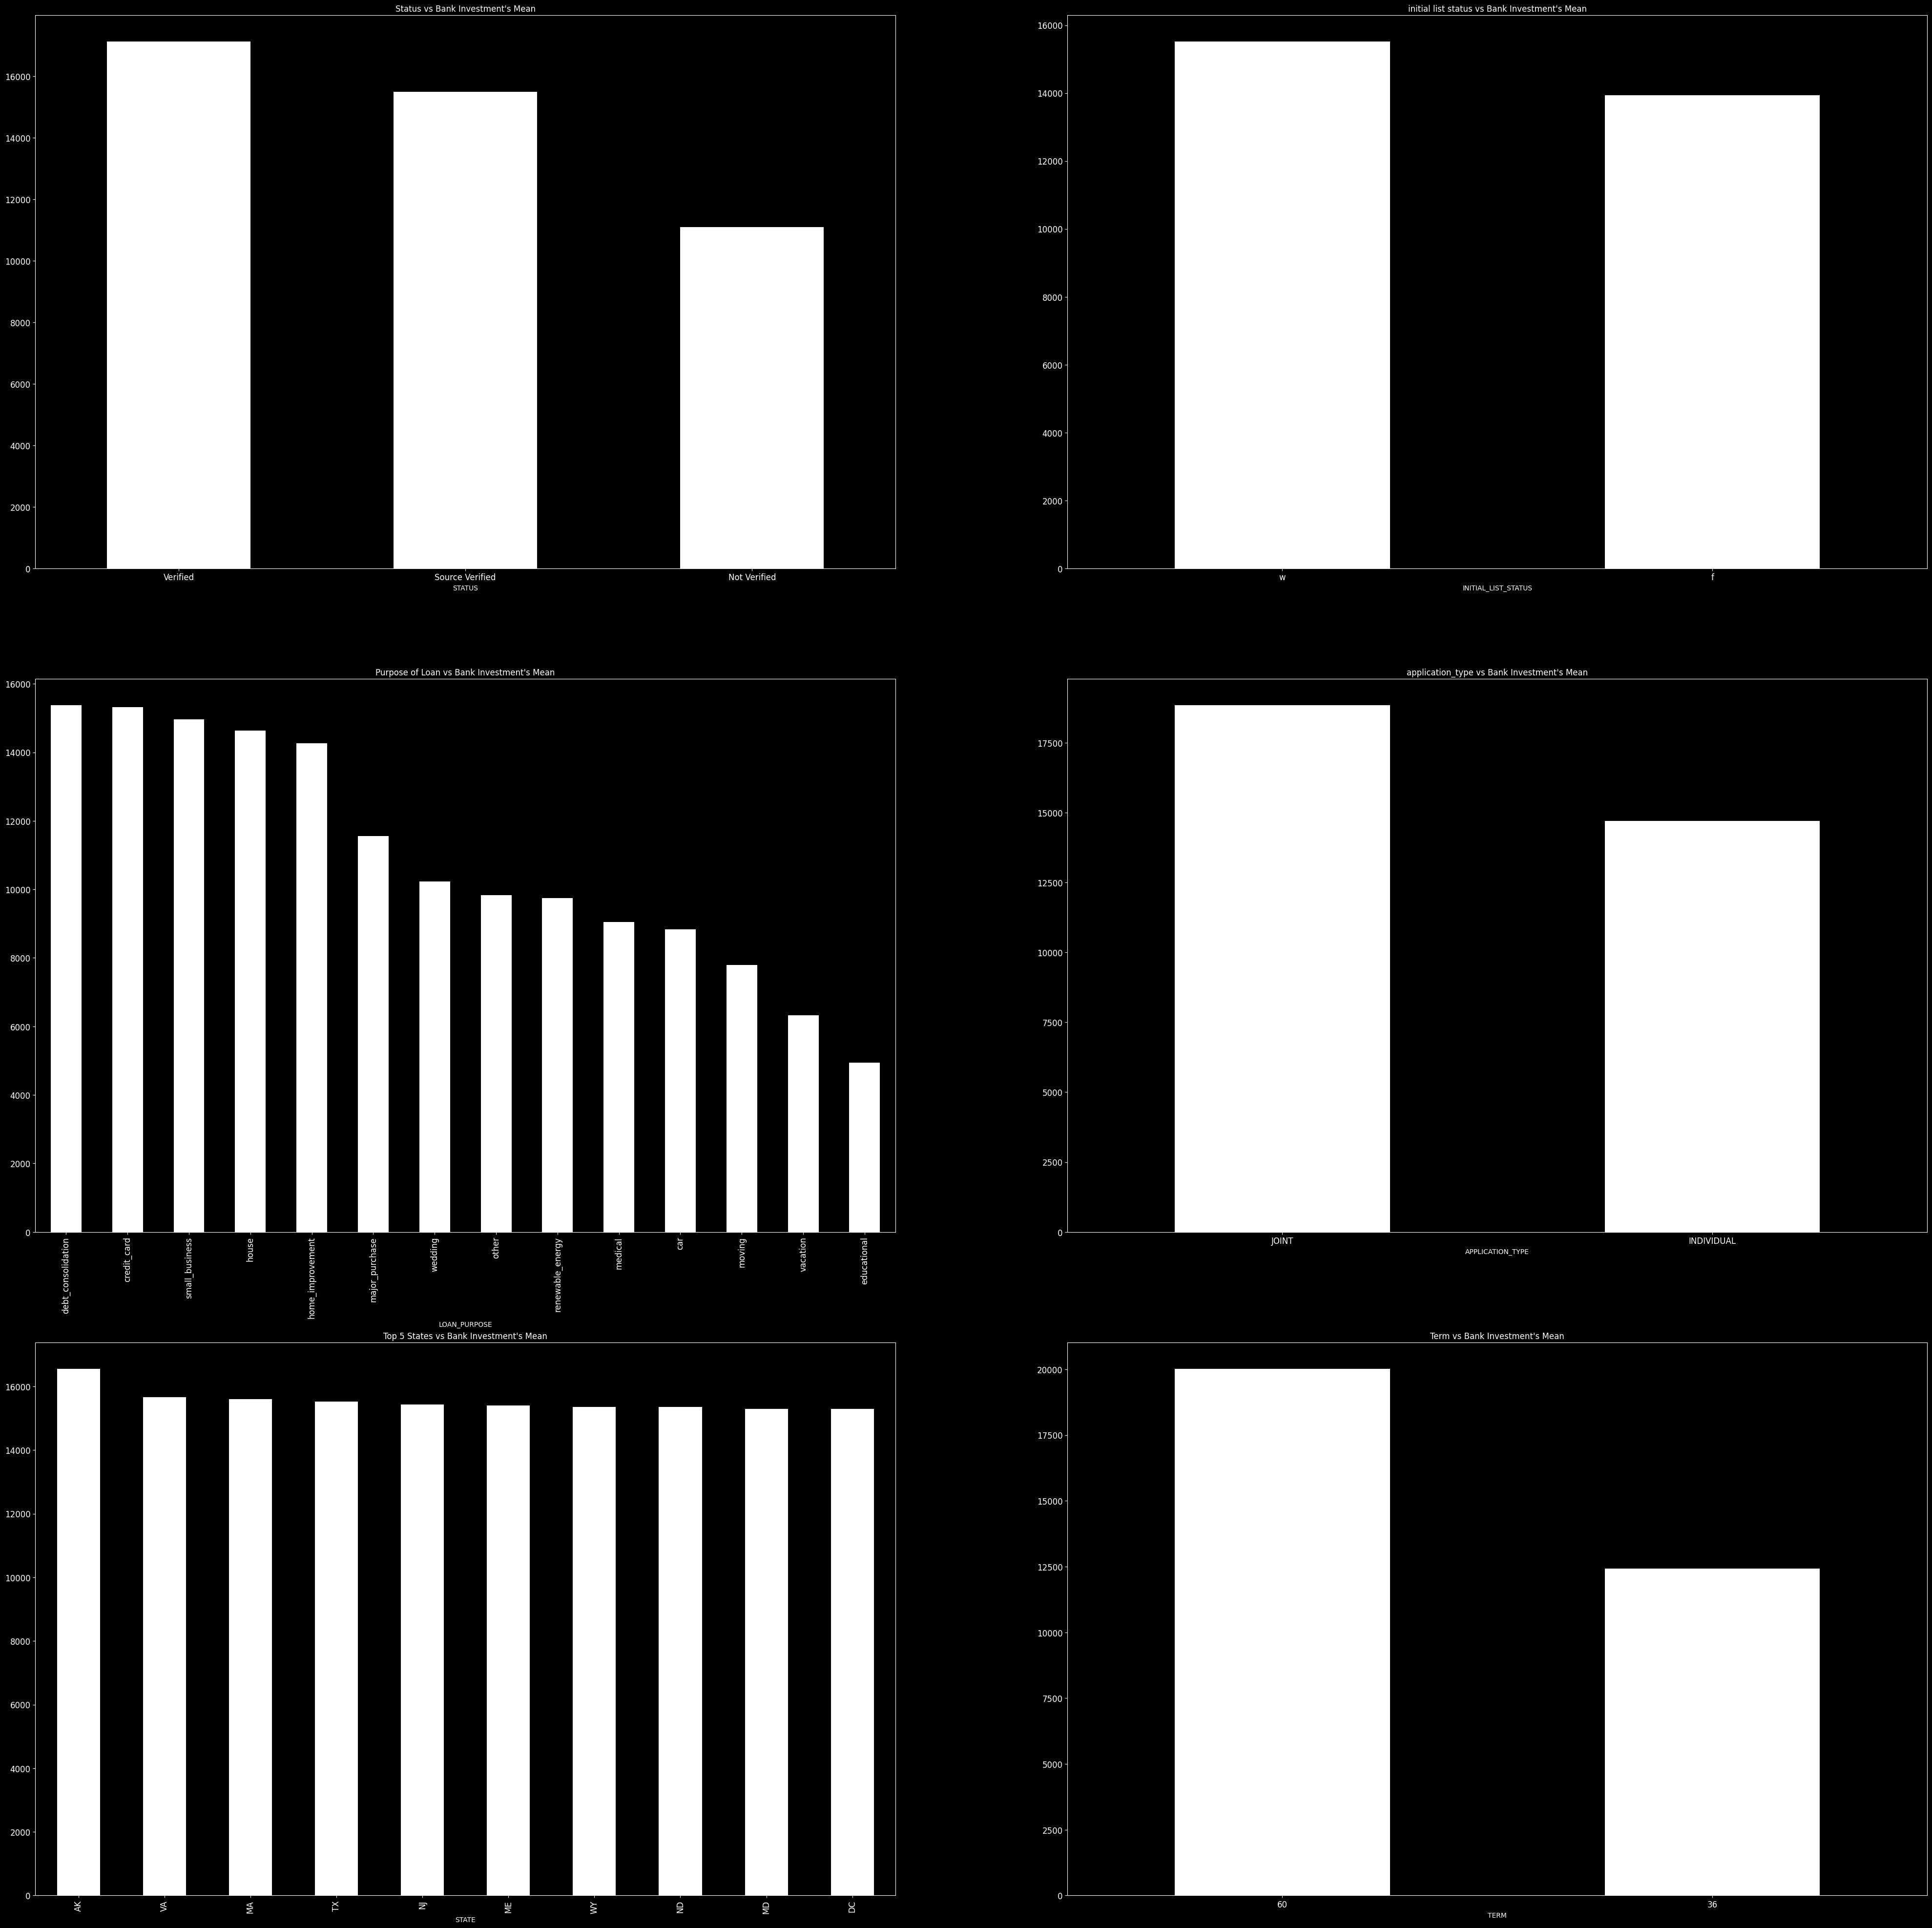

In [47]:
fig, ax = plt.subplots(3, 2, figsize=(50, 50))
plt.style.use('dark_background')

df_2.groupby('STATUS')['BANK_INVESTMENT'].mean().sort_values(ascending=False).plot.bar(ax=ax[0][0], fontsize=12, color='white')
ax[0][0].set_title("Status vs Bank Investment's Mean", fontsize=12)
ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=0)

df_2.groupby('LOAN_PURPOSE')['BANK_INVESTMENT'].mean().sort_values(ascending=False).plot.bar(ax=ax[1][0], fontsize=12, color='white')
ax[1][0].set_title("Purpose of Loan vs Bank Investment's Mean", fontsize=12)

df_2.groupby('STATE')['BANK_INVESTMENT'].mean().sort_values(ascending=False).head(10).plot.bar(ax=ax[2][0], fontsize=12, color='white')
ax[2][0].set_title("Top 5 States vs Bank Investment's Mean", fontsize=12)

df_2.groupby('INITIAL_LIST_STATUS')['BANK_INVESTMENT'].mean().sort_values(ascending=False).plot.bar(ax=ax[0][1], fontsize=12, color='white')
ax[0][1].set_title("initial list status vs Bank Investment's Mean", fontsize=12)
ax[0][1].set_xticklabels(ax[0][1].get_xticklabels(), rotation=0)

df_2.groupby('APPLICATION_TYPE')['BANK_INVESTMENT'].mean().sort_values(ascending=False).plot.bar(ax=ax[1][1], fontsize=12, color='white')
ax[1][1].set_title("application_type vs Bank Investment's Mean", fontsize=12)
ax[1][1].set_xticklabels(ax[1][1].get_xticklabels(), rotation=0)

df_2.groupby('TERM')['BANK_INVESTMENT'].mean().sort_values(ascending=False).plot.bar(ax=ax[2][1], fontsize=12, color='white')
ax[2][1].set_title("Term vs Bank Investment's Mean", fontsize=12)
ax[2][1].set_xticklabels(ax[2][1].get_xticklabels(), rotation=0)


MULTIVARIATE ANALYSIS

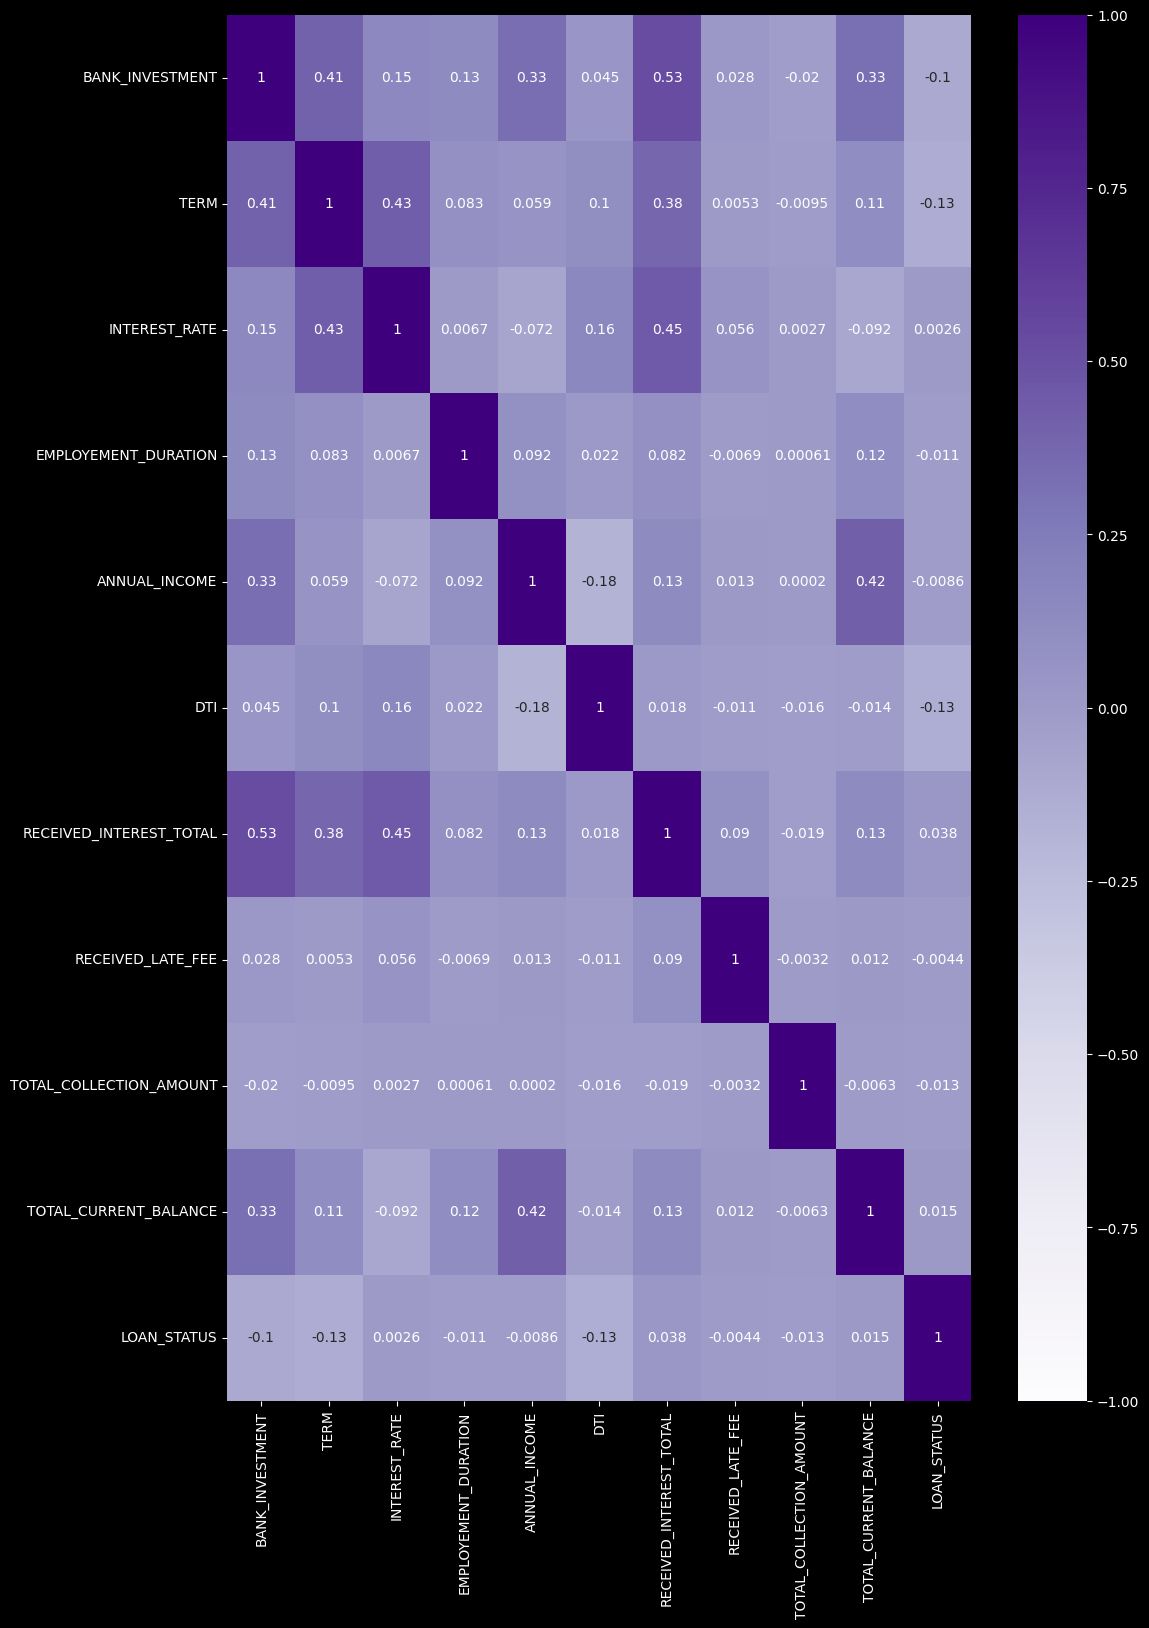

In [ ]:
plt.figure(figsize=(12,18))   # CORRELATION CAN BE DONE ONLY FOR NUMERICAL FEATURES
sns.heatmap(df_2[num_columns].corr(), annot=True, vmin=-1, vmax=1, cmap='Purples')
plt.show()